# Consumer Price Index (CPI) Jamaica

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Data prep

In [2]:
file_path = r"C:\Users\nicho\Downloads\DZ-2024-06-17-12-35-28.csv"

data = pd.read_csv(file_path)

# Rename columns for easier manipulation
data.columns = ['Series Title'] + pd.date_range(start='2020-05-01', periods=48, freq='M').strftime('%Y-%m').tolist()

# Reshape the data to a long format
data_long = pd.melt(data, id_vars=['Series Title'], var_name='Date', value_name='CPI')

# Convert 'Date' to datetime
data_long['Date'] = pd.to_datetime(data_long['Date'])

# Display the first few rows of the cleaned dataset
data_long.head()

,Series Title,Date,CPI
0,ALL DIVISIONS - ALL ITEMS,2020-05-01,0.1
1,FOOD AND NON-ALCOHOLIC BEVERAGES,2020-05-01,1.1
2,FOOD,2020-05-01,1.1
3,Cereals and cereal products (ND),2020-05-01,0.6
4,Meat and other parts of slaughtered land...,2020-05-01,0.6


In [14]:
# Calculate summary statistics
summary_stats = data_long.groupby('Series Title').describe()
summary_demo = data_long.head(20).groupby('Series Title').describe()

summary_demo

Date                       \
                                                   count                 mean   
Series Title                                                                    
        Tubers, Plantains and cooking Banana (S...     1  2020-05-01 00:00:00   
        Vegetables                                     1  2020-05-01 00:00:00   
      Cereals and cereal products (ND)                 1  2020-05-01 00:00:00   
      Coffee, Tea, Cocoa                               1  2020-05-01 00:00:00   
      Fish  and Seafood (ND)                           1  2020-05-01 00:00:00   
      Fruit and vegetable juices (ND)                  1  2020-05-01 00:00:00   
      Fruits and nuts (ND)                             1  2020-05-01 00:00:00   
      Meat and other parts of slaughtered land ...     1  2020-05-01 00:00:00   
      Milk, other dairy products and eggs (ND)         1  2020-05-01 00:00:00   
      Oils and Fats (ND)                               1  2020-05-01 00:00:00   
      Ready-made food and other food products n...     1  2020-05-01 00:00:00   
      Sugar, confectionery and desserts (ND)           1  2020-05-01 00:00:00   
      Vegetables, tubers, plantains, cooking ba...     1  2020-05-01 00:00:00   
      Water, Soft drinks and Other non-alcholic...     1  2020-05-01 00:00:00   
    FOOD                                               1  2020-05-01 00:00:00   
    NON-ALCOHOLIC BEVERAGES                            1  2020-05-01 00:00:00   
ALCOHOLIC BEVERAGES TOBACCO AND NARCOTICS              1  2020-05-01 00:00:00   
ALL DIVISIONS - ALL ITEMS                              1  2020-05-01 00:00:00   
CLOTHING AND FOOTWEAR                                  1  2020-05-01 00:00:00   
FOOD AND NON-ALCOHOLIC BEVERAGES                       1  2020-05-01 00:00:00   

                                                                         \
                                                                    min   
Series Title                                                              
        Tubers, Plantains and cooking Banana (S...  2020-05-01 00:00:00   
        Vegetables                                  2020-05-01 00:00:00   
      Cereals and cereal products (ND)              2020-05-01 00:00:00   
      Coffee, Tea, Cocoa                            2020-05-01 00:00:00   
      Fish  and Seafood (ND)                        2020-05-01 00:00:00   
      Fruit and vegetable juices (ND)               2020-05-01 00:00:00   
      Fruits and nuts (ND)                          2020-05-01 00:00:00   
      Meat and other parts of slaughtered land ...  2020-05-01 00:00:00   
      Milk, other dairy products and eggs (ND)      2020-05-01 00:00:00   
      Oils and Fats (ND)                            2020-05-01 00:00:00   
      Ready-made food and other food products n...  2020-05-01 00:00:00   
      Sugar, confectionery and desserts (ND)        2020-05-01 00:00:00   
      Vegetables, tubers, plantains, cooking ba...  2020-05-01 00:00:00   
      Water, Soft drinks and Other non-alcholic...  2020-05-01 00:00:00   
    FOOD                                            2020-05-01 00:00:00   
    NON-ALCOHOLIC BEVERAGES                         2020-05-01 00:00:00   
ALCOHOLIC BEVERAGES TOBACCO AND NARCOTICS           2020-05-01 00:00:00   
ALL DIVISIONS - ALL ITEMS                           2020-05-01 00:00:00   
CLOTHING AND FOOTWEAR                               2020-05-01 00:00:00   
FOOD AND NON-ALCOHOLIC BEVERAGES                    2020-05-01 00:00:00   

                                                                         \
                                                                    25%   
Series Title                                                              
        Tubers, Plantains and cooking Banana (S...  2020-05-01 00:00:00   
        Vegetables                                  2020-05-01 00:00:00   
      Cereals and cereal products (ND)              2020-05-01 00:00:00   
      Coffee

# Main Categories

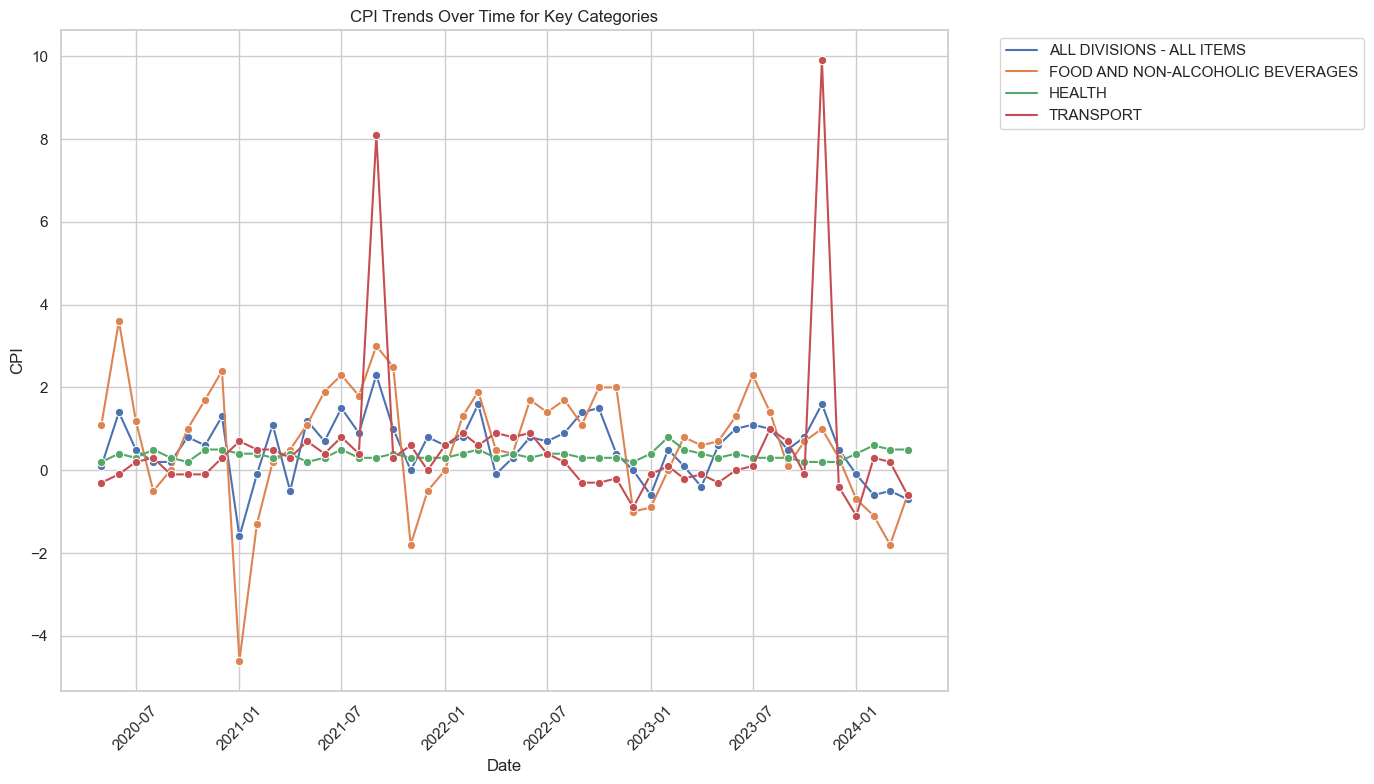

In [9]:

key_categories = [
    'ALL DIVISIONS - ALL ITEMS', 
    'FOOD AND NON-ALCOHOLIC BEVERAGES', 
    'HOUSING, WATER, ELECTRICITY, GAS AND OTHER FUELS',
    'TRANSPORT', 
    'HEALTH'
]

# Filter data for key categories
data_key_categories = data_long[data_long['Series Title'].isin(key_categories)]

# Plot CPI trends over time for key categories
plt.figure(figsize=(14, 8))
sns.lineplot(data=data_key_categories, x='Date', y='CPI', hue='Series Title', marker='o')

# Customize the plot
plt.title('CPI Trends Over Time for Key Categories')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\nicho\AppData\Local\Temp\ipykernel_2044\1041156087.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_categories_data['Date'] = pd.to_datetime(other_categories_data['Date'])
C:\Users\nicho\AppData\Local\Temp\ipykernel_2044\1041156087.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  other_categories_data.sort_values('Date', inplace=True)


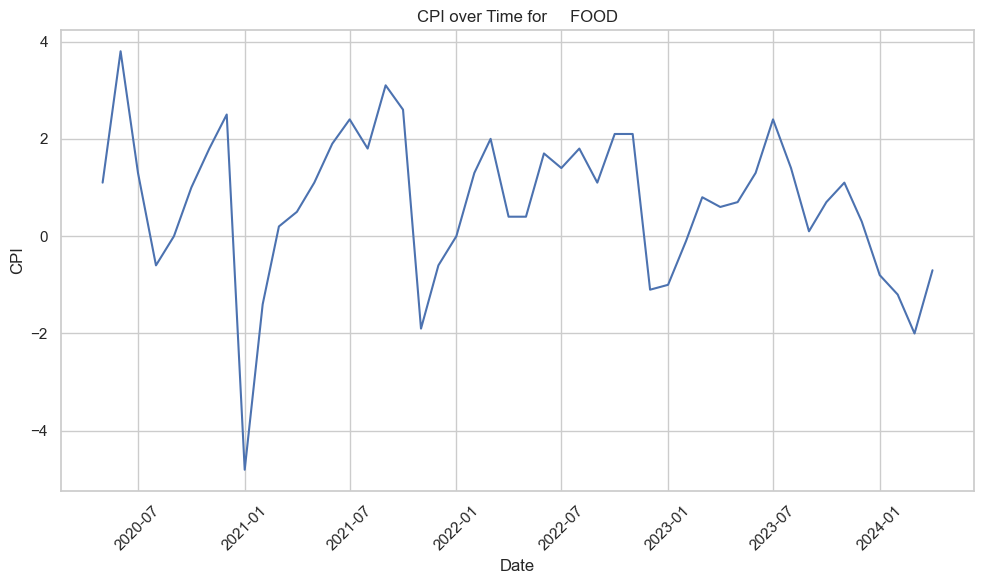

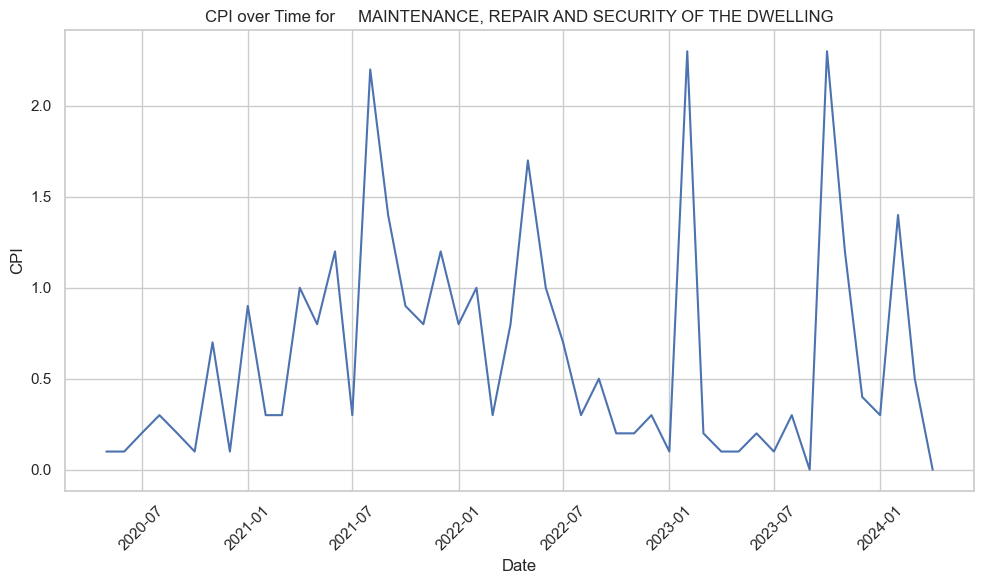

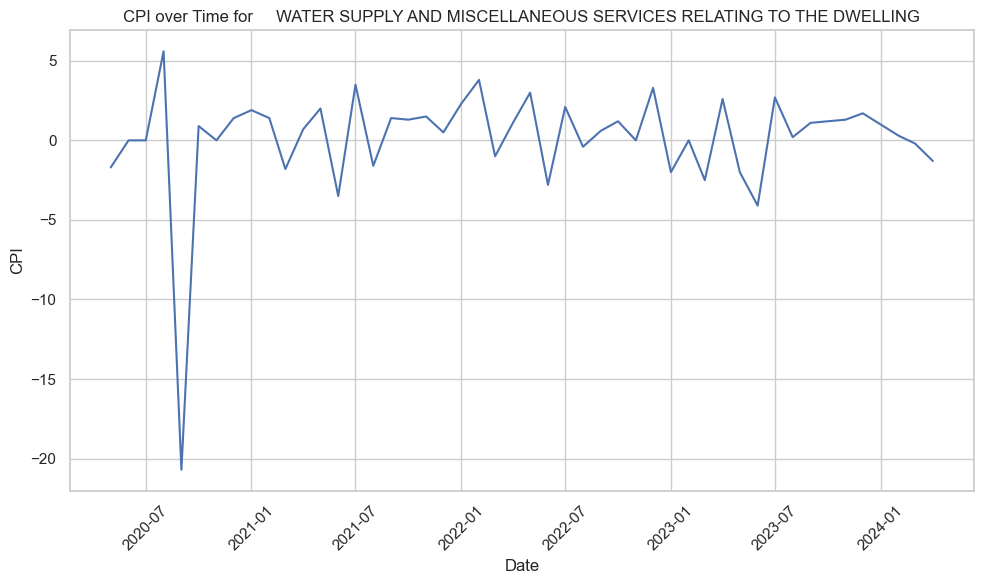

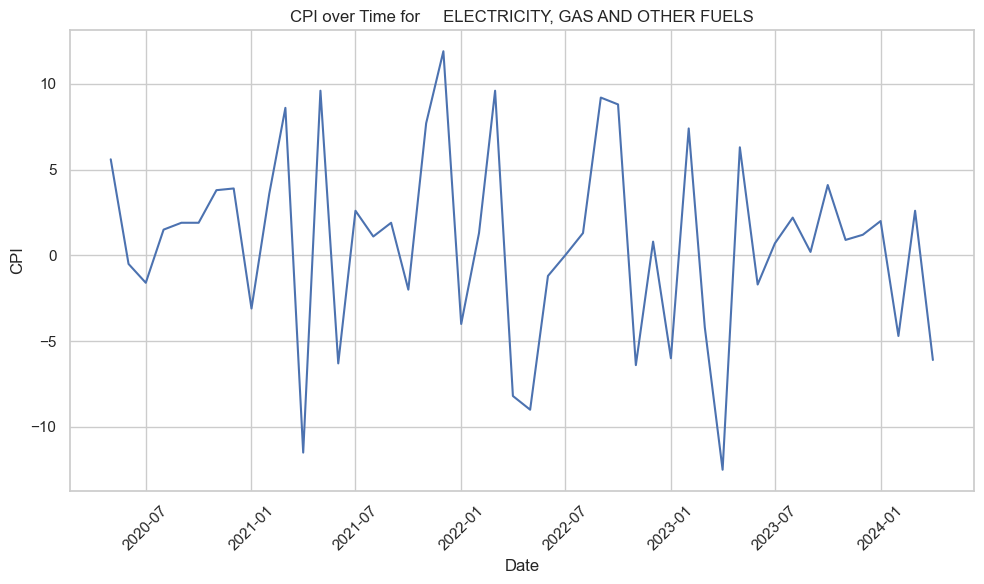

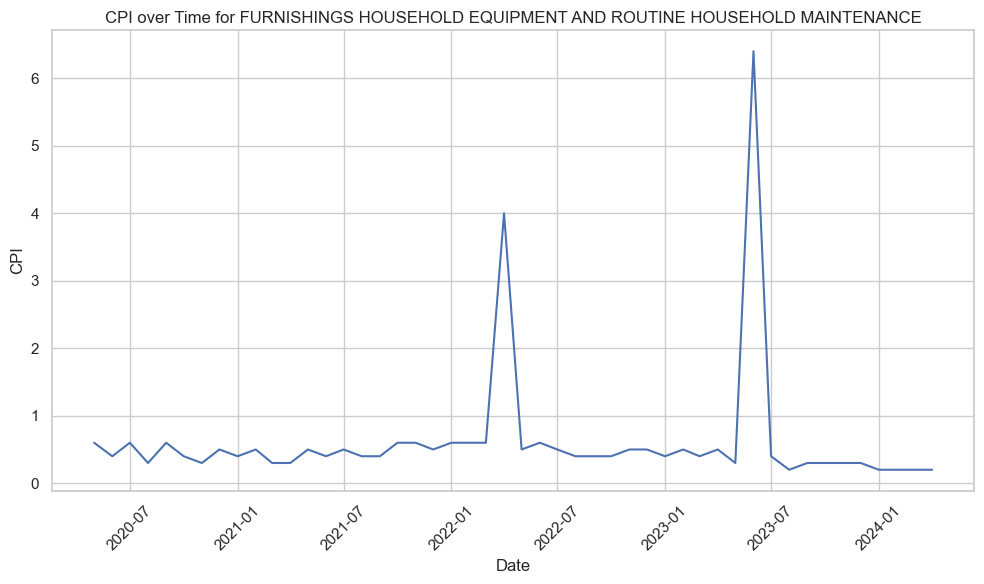

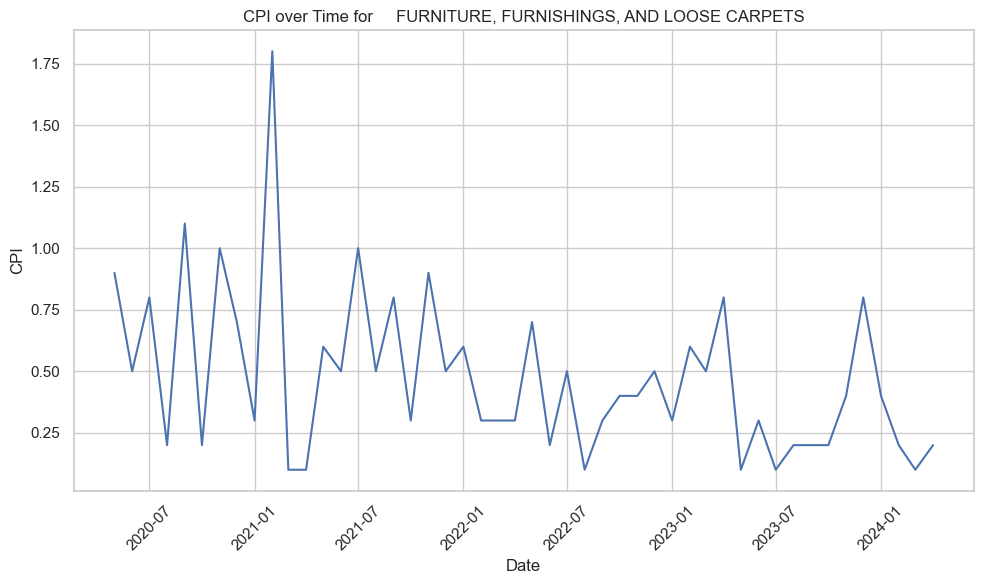

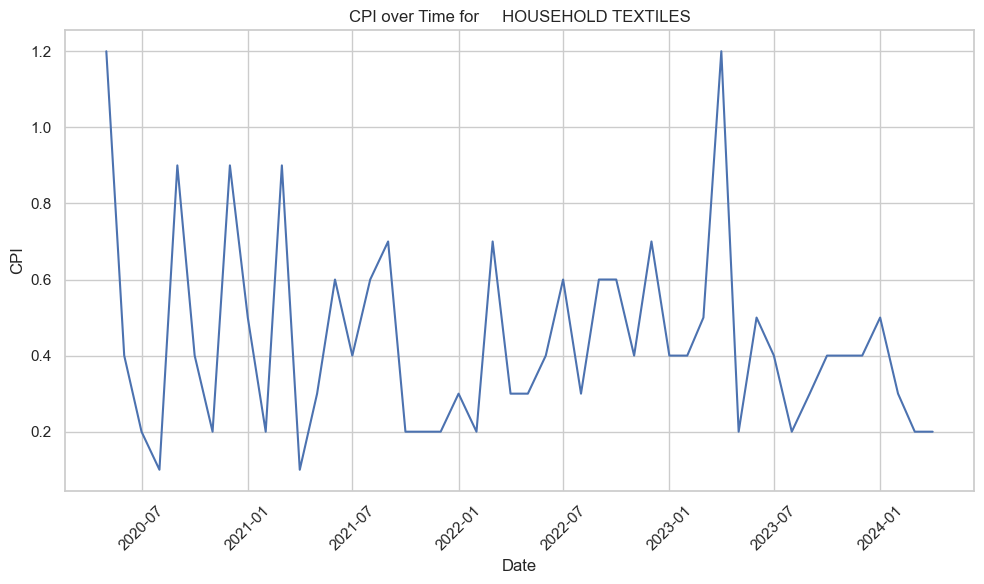

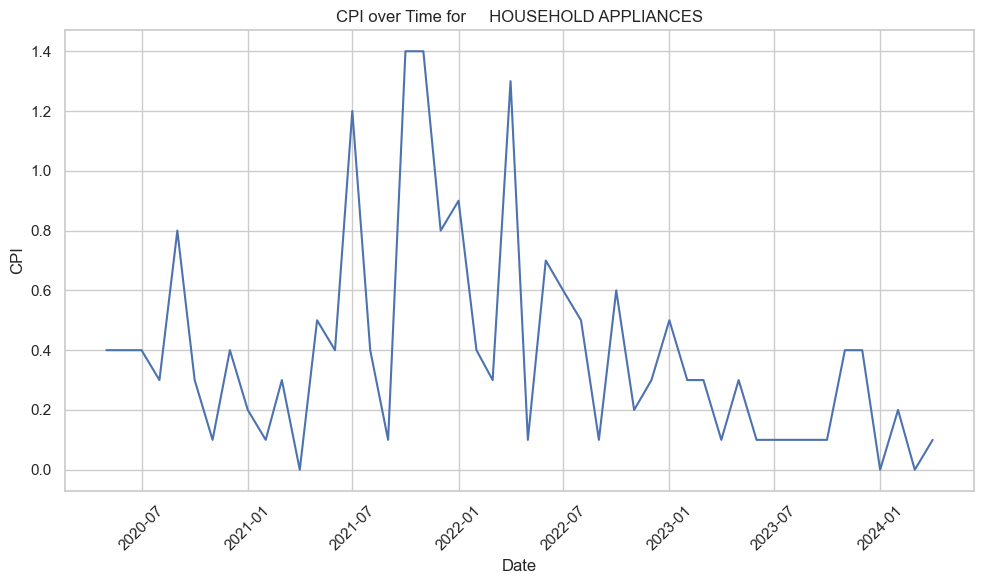

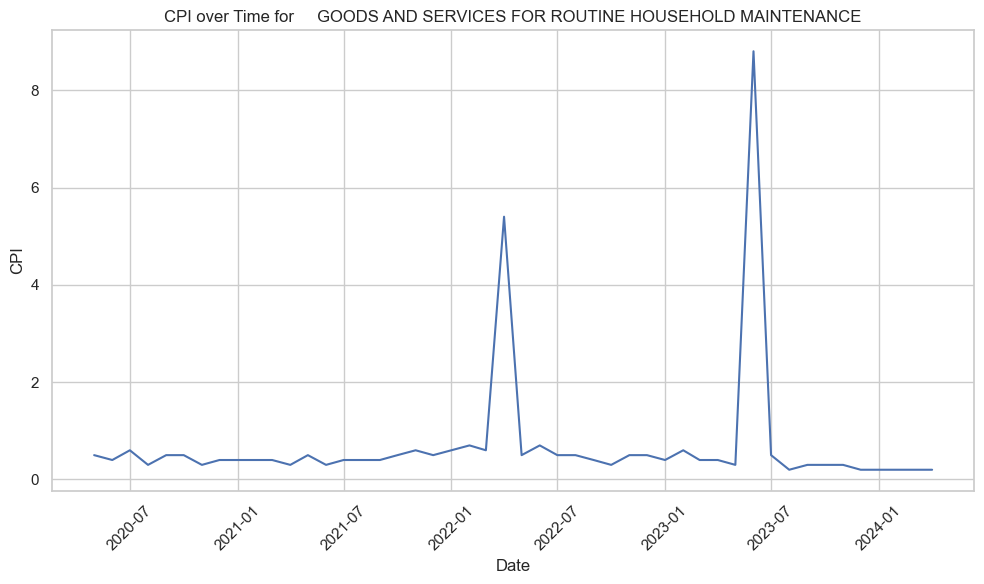

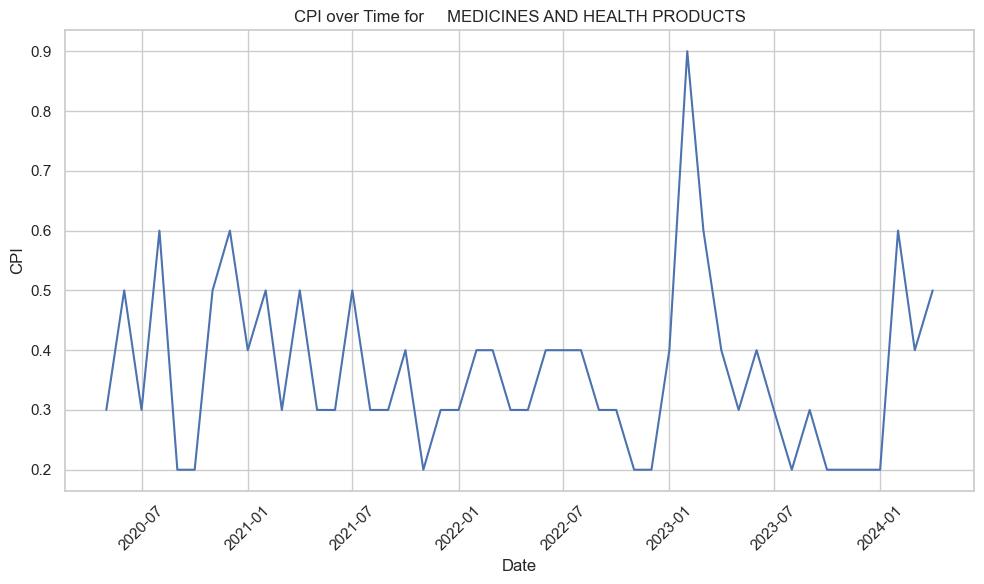

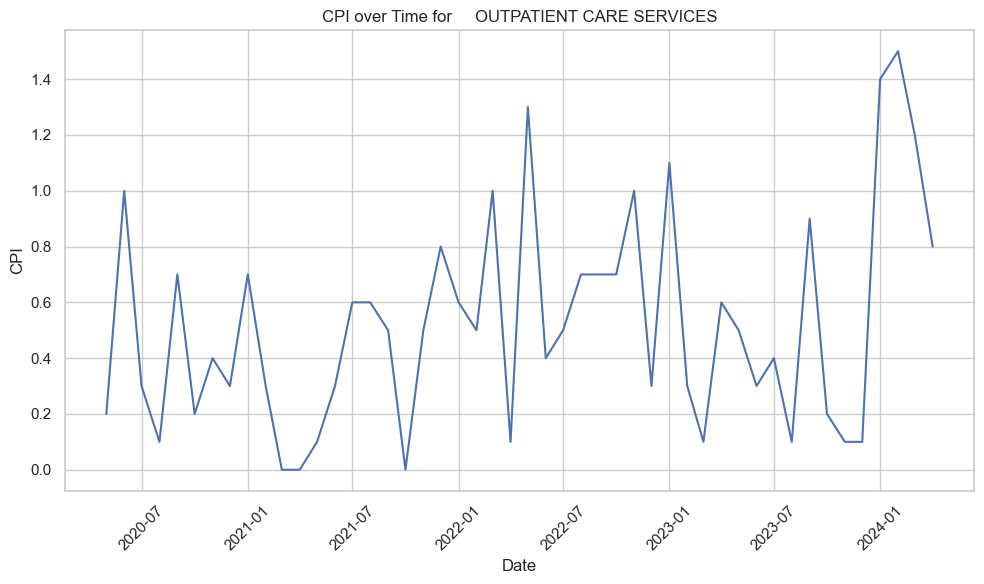

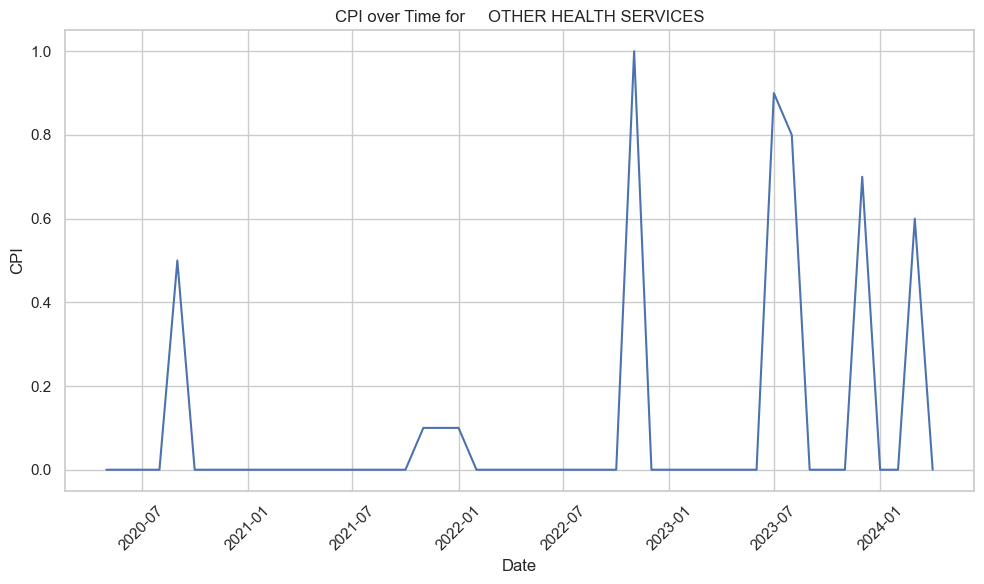

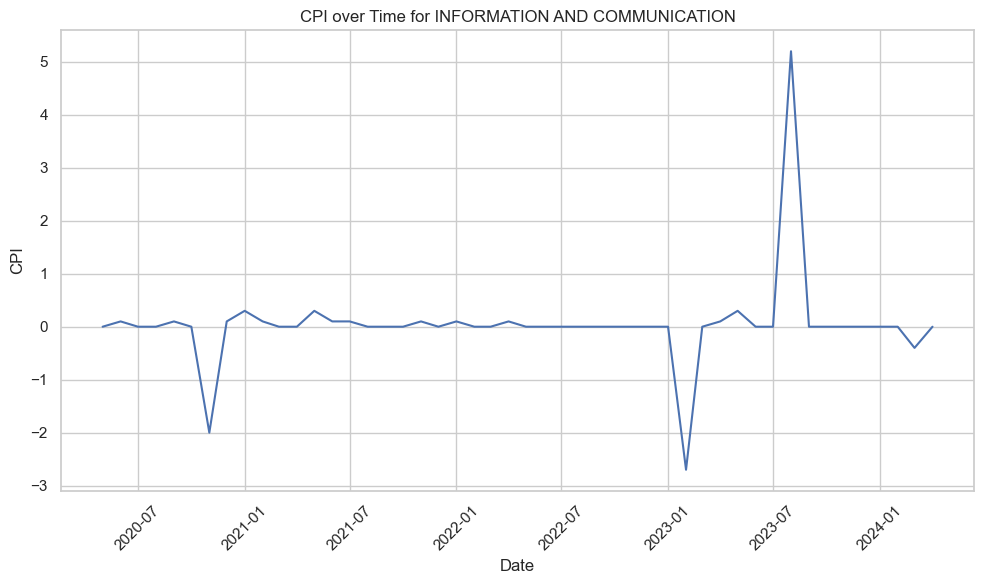

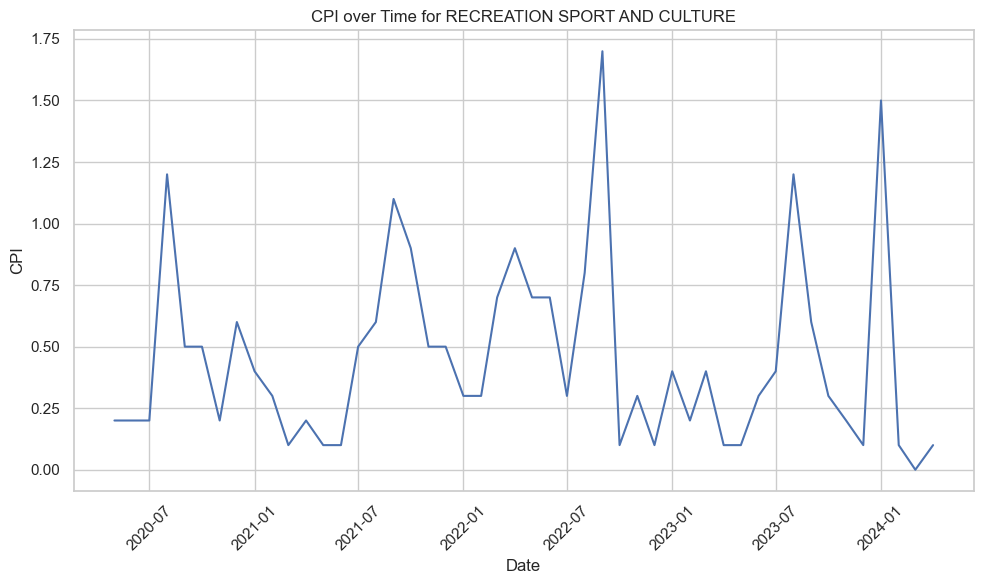

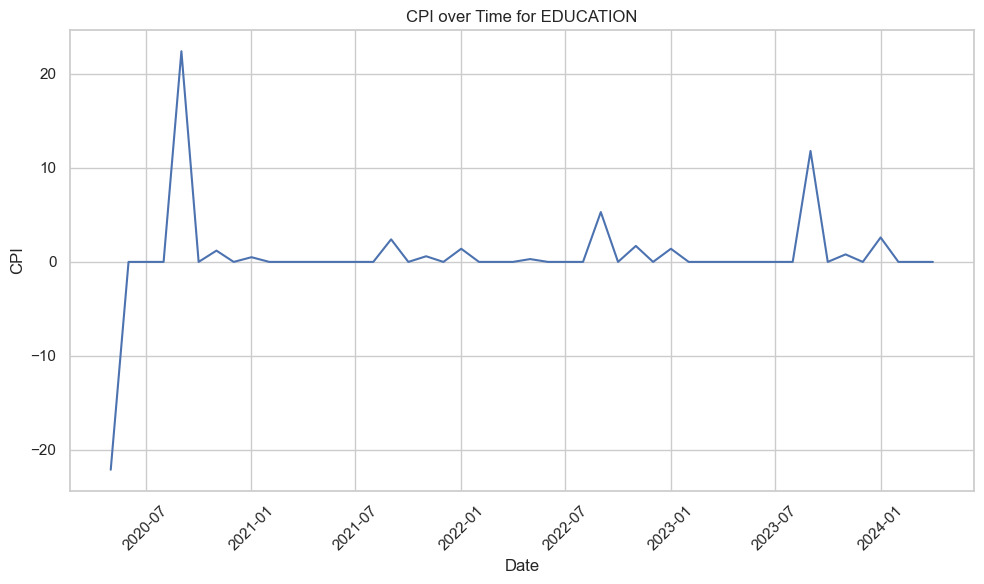

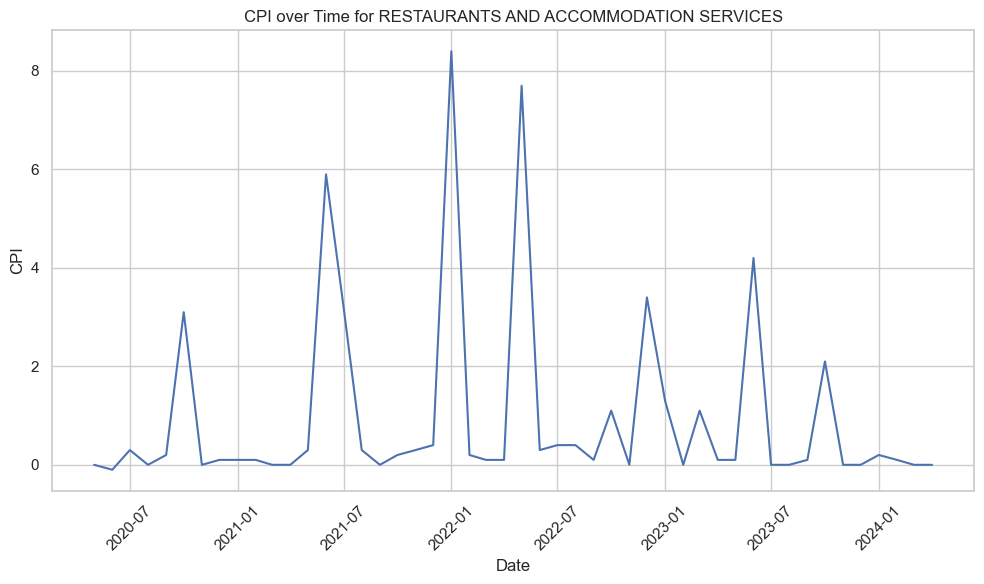

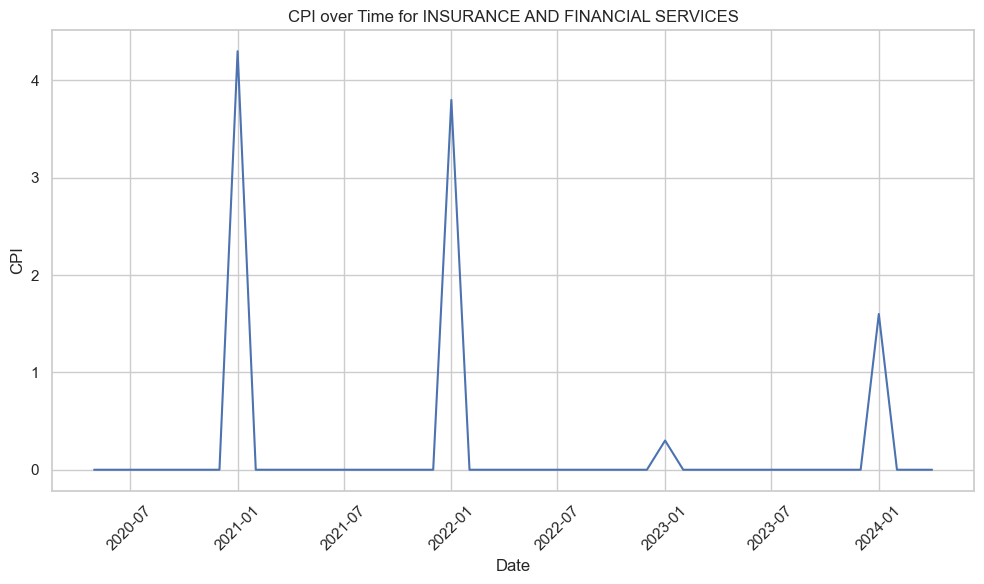

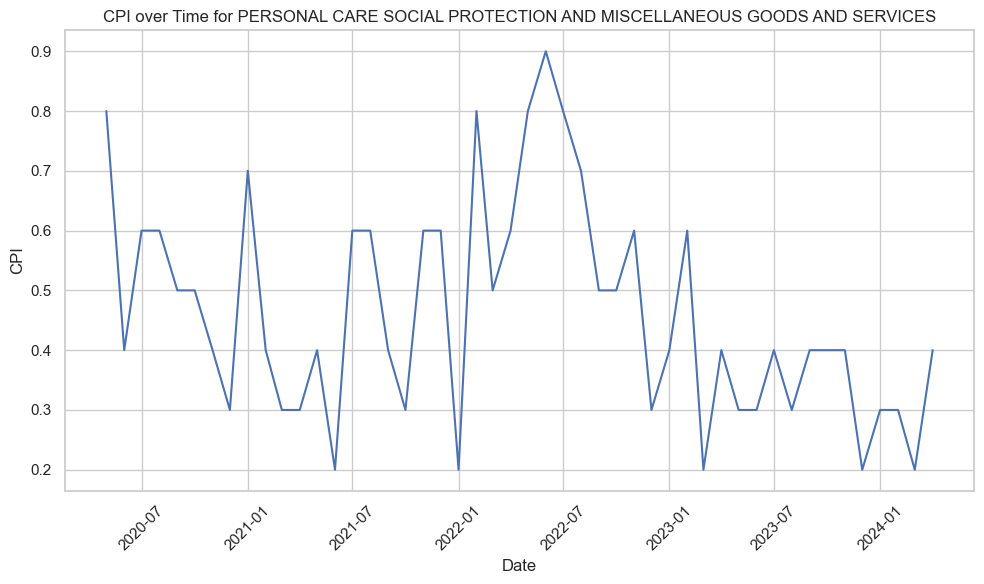

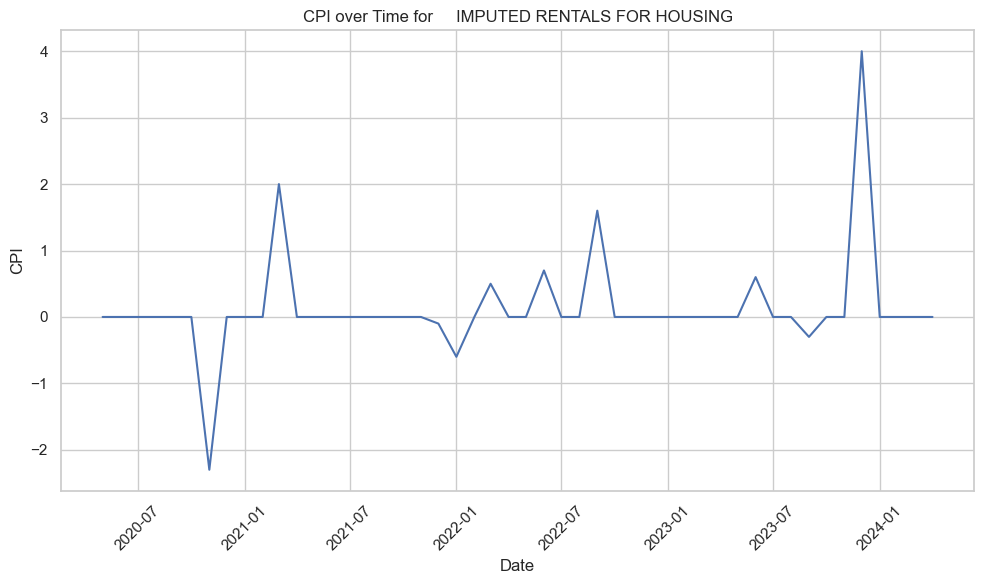

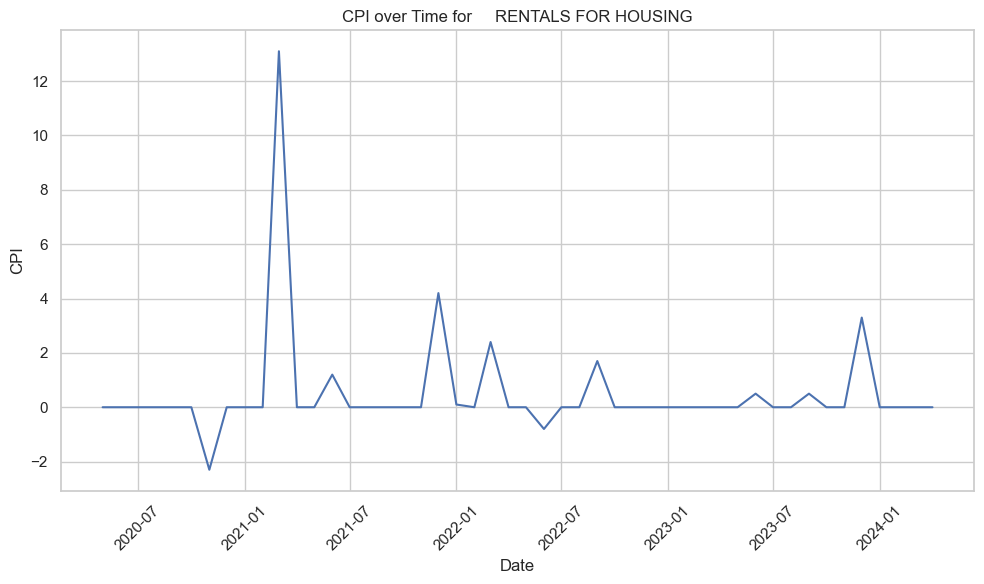

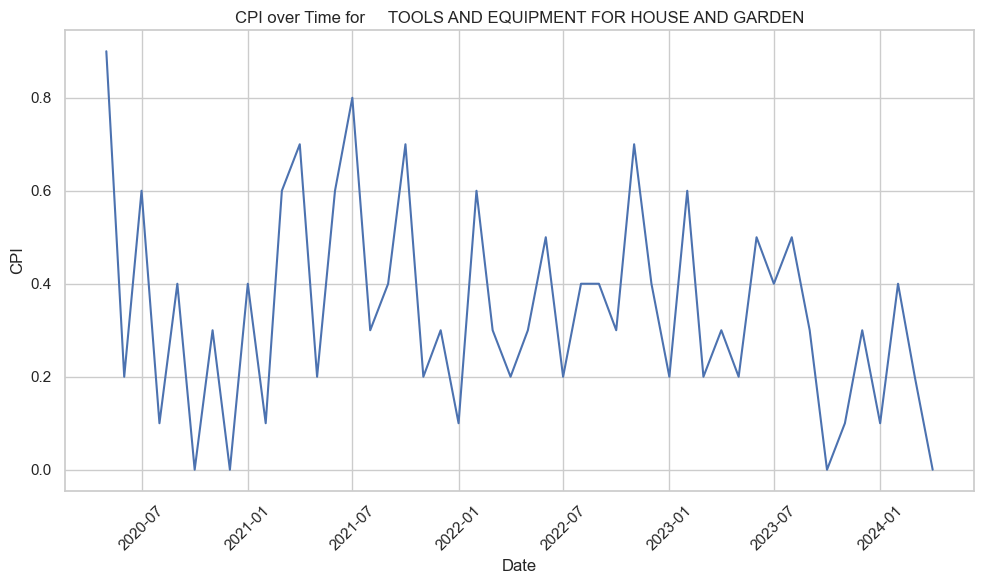

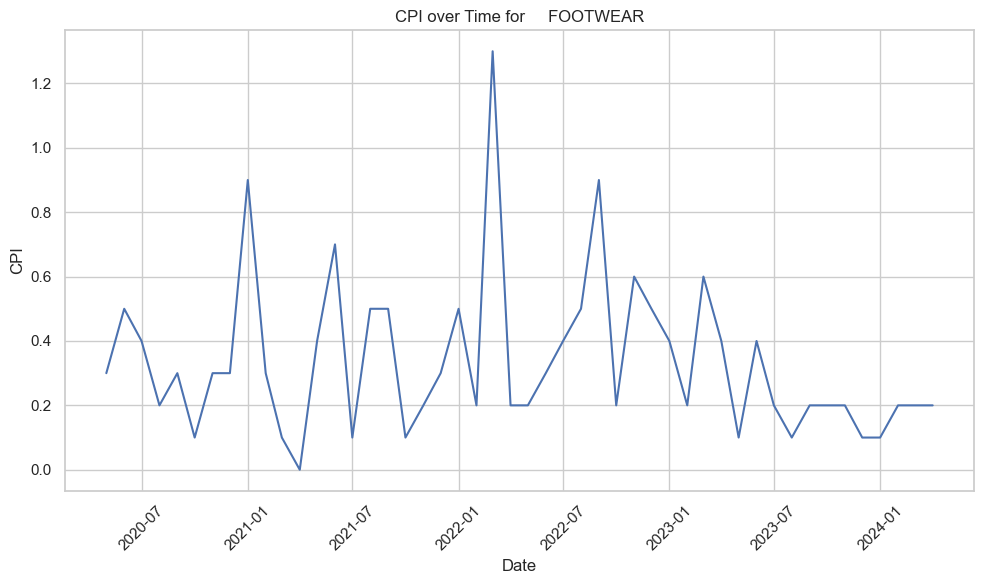

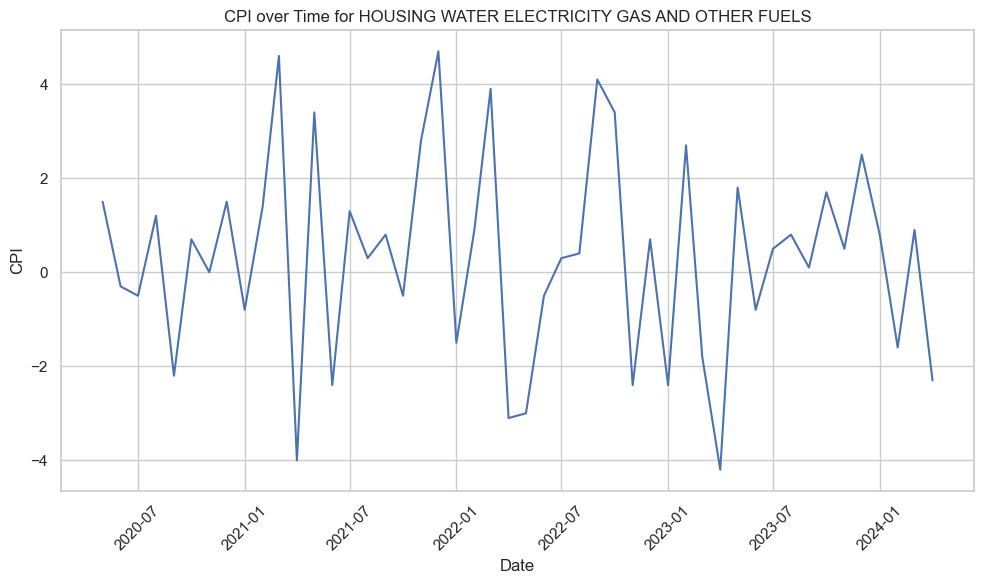

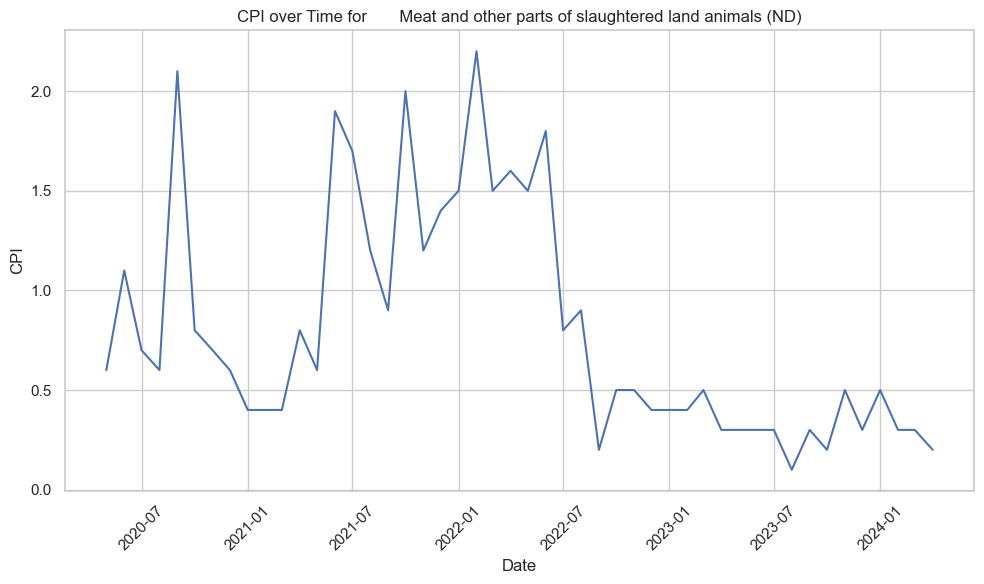

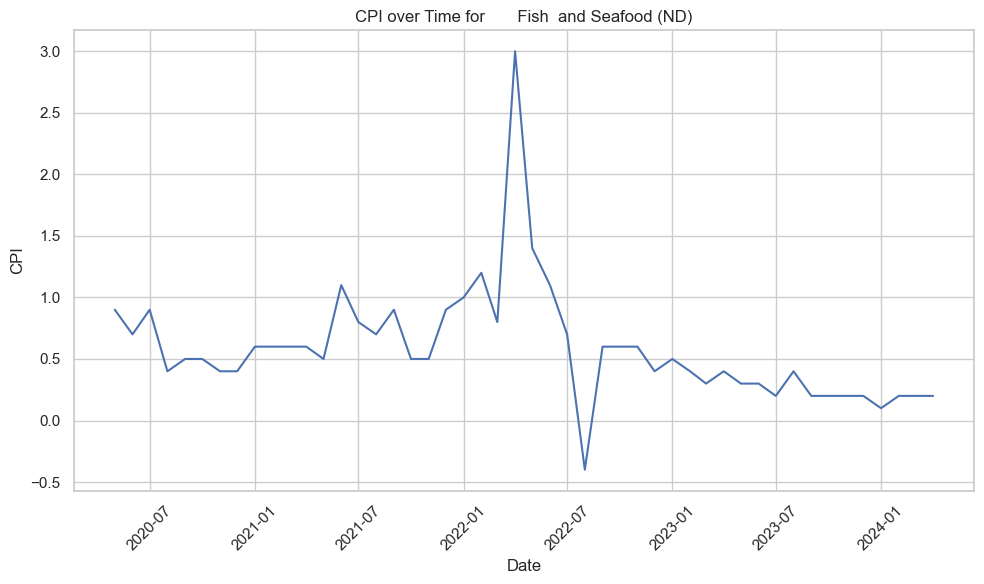

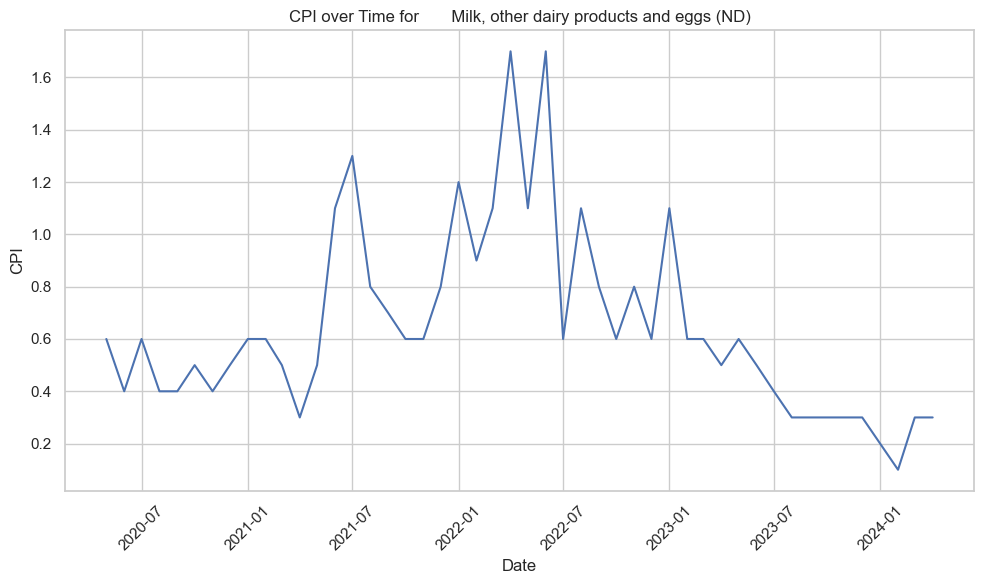

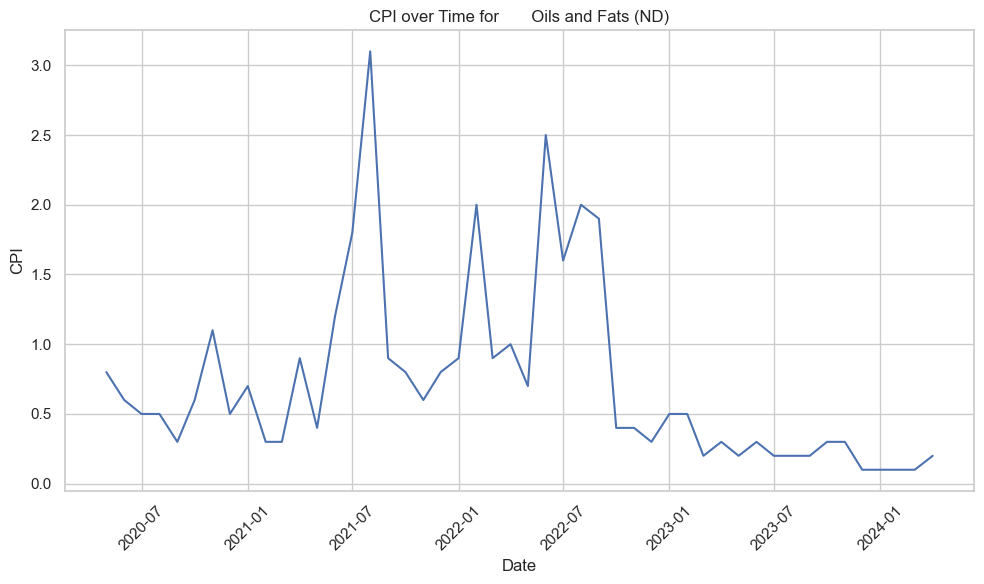

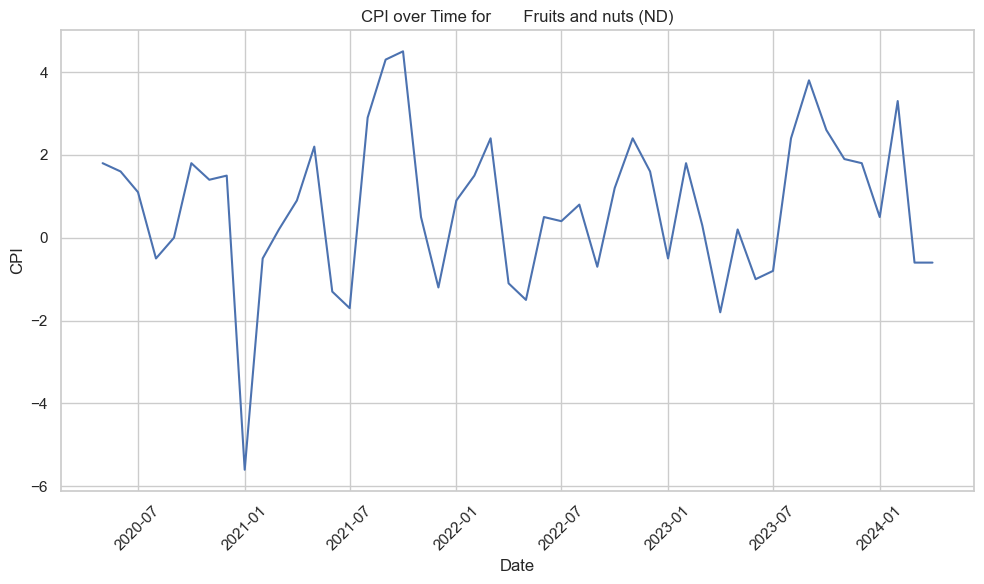

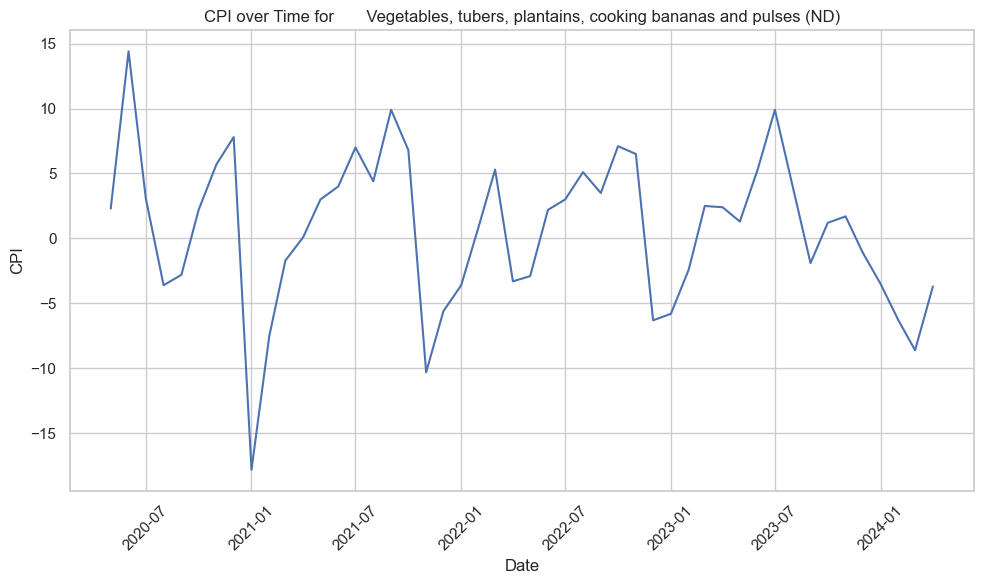

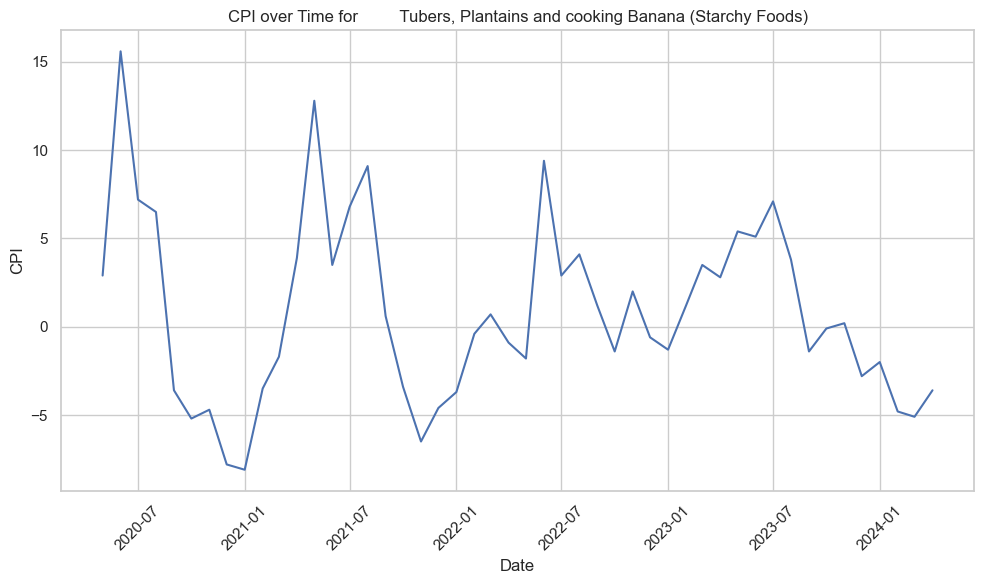

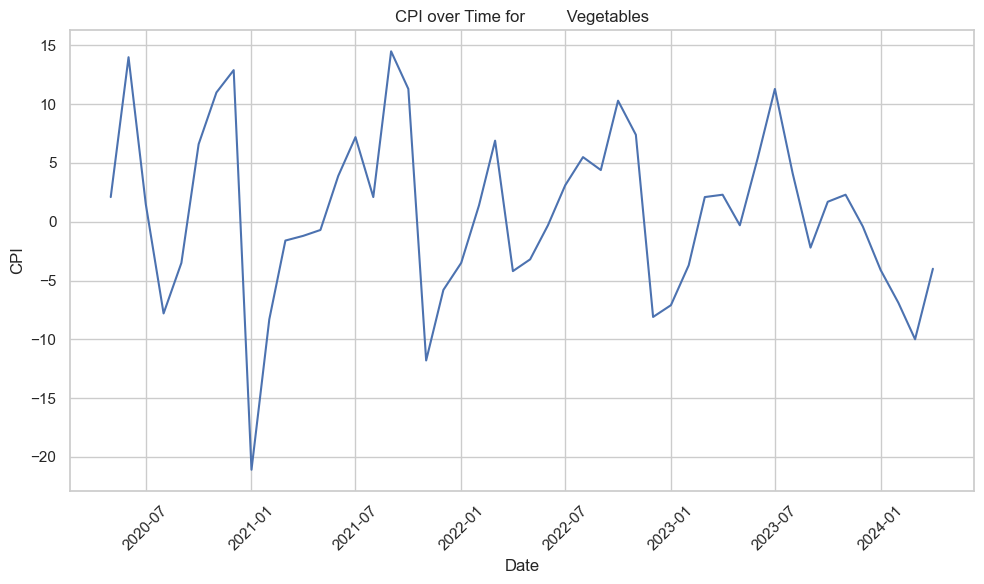

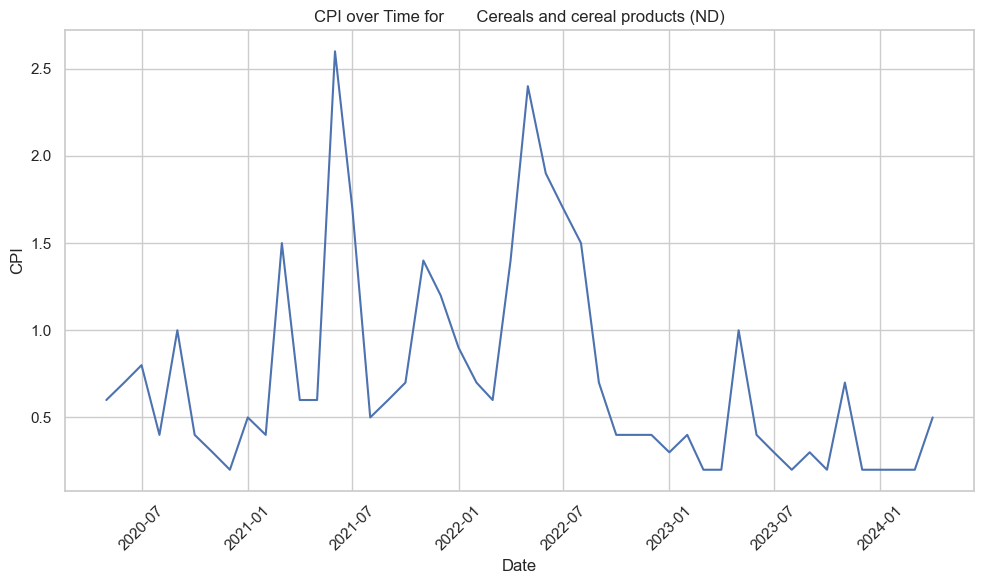

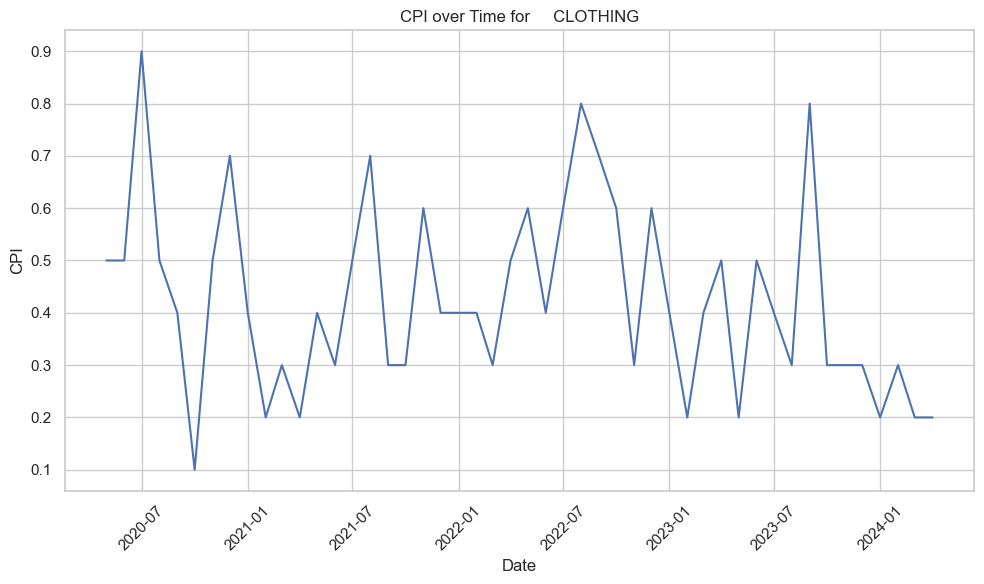

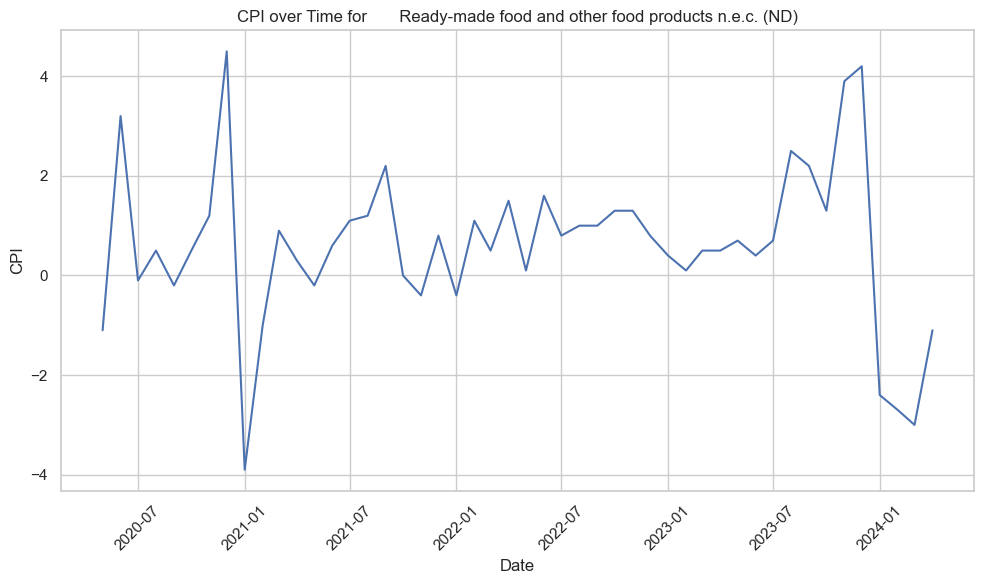

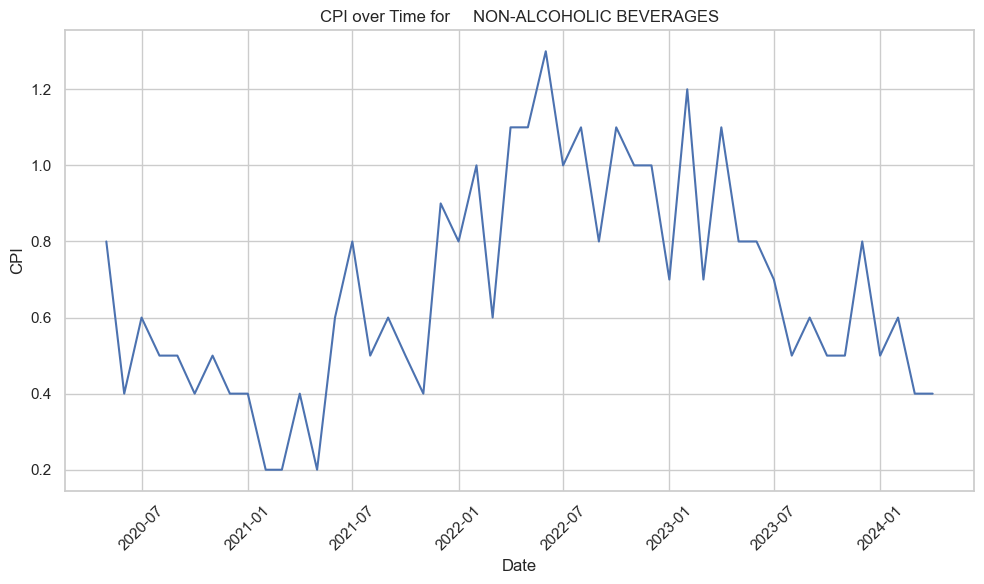

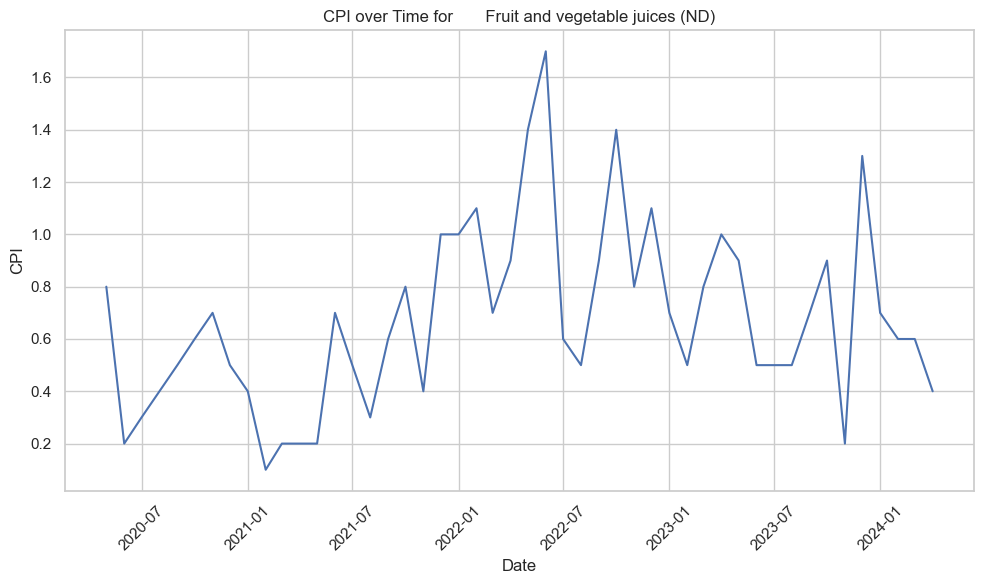

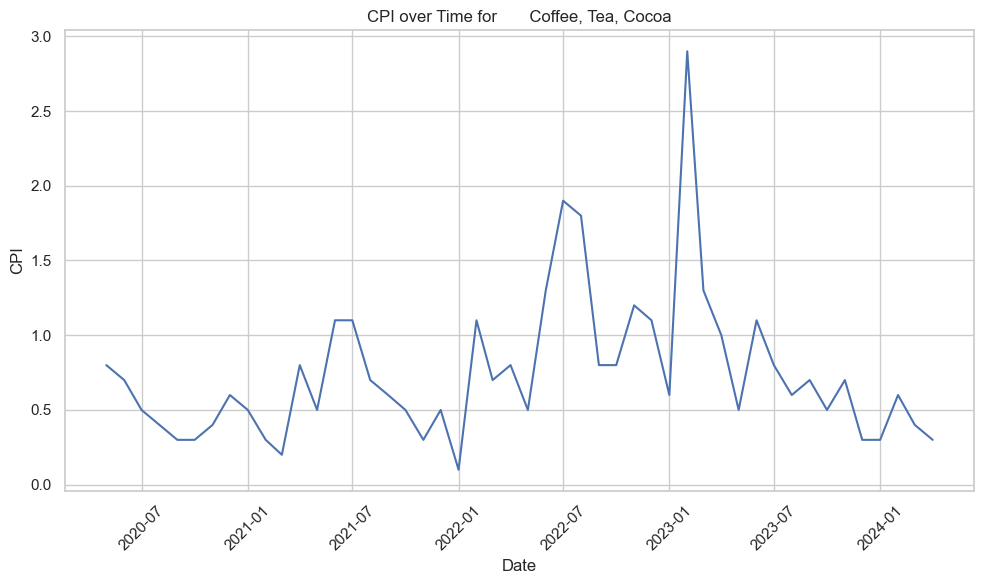

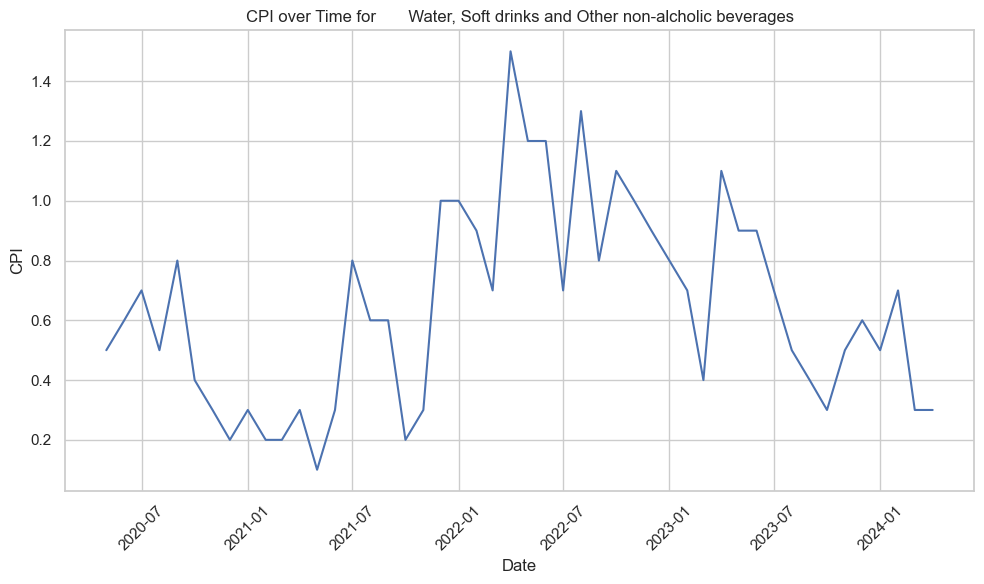

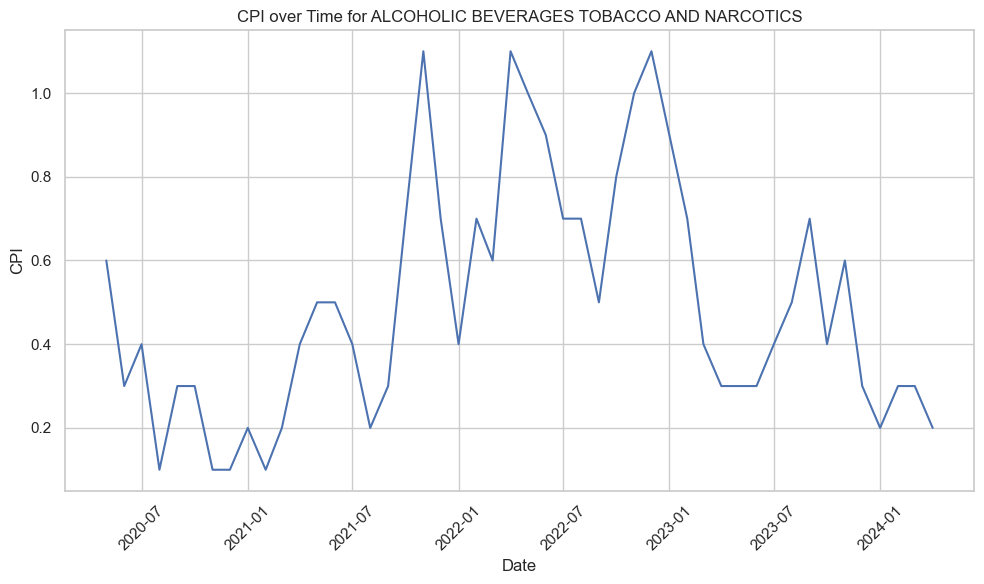

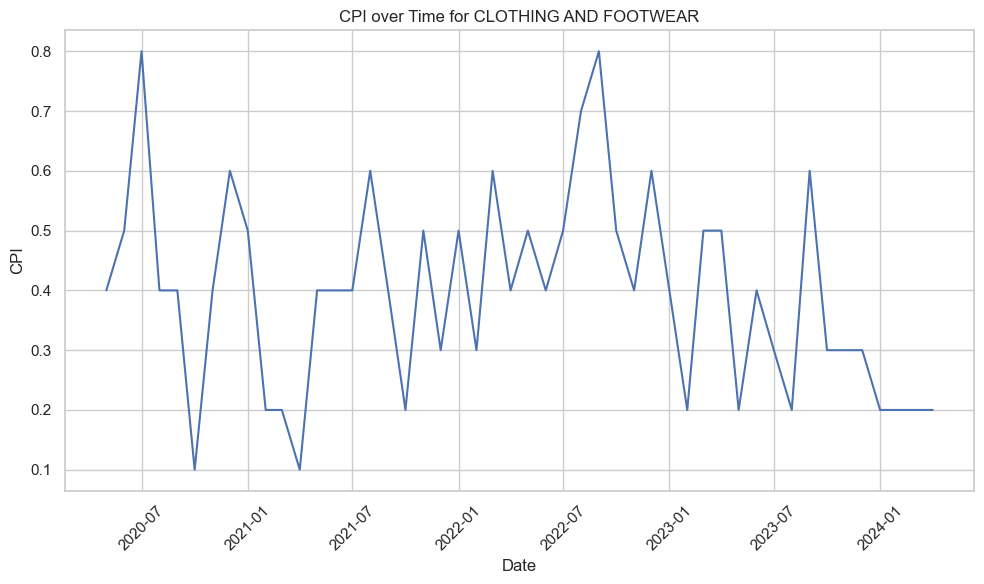

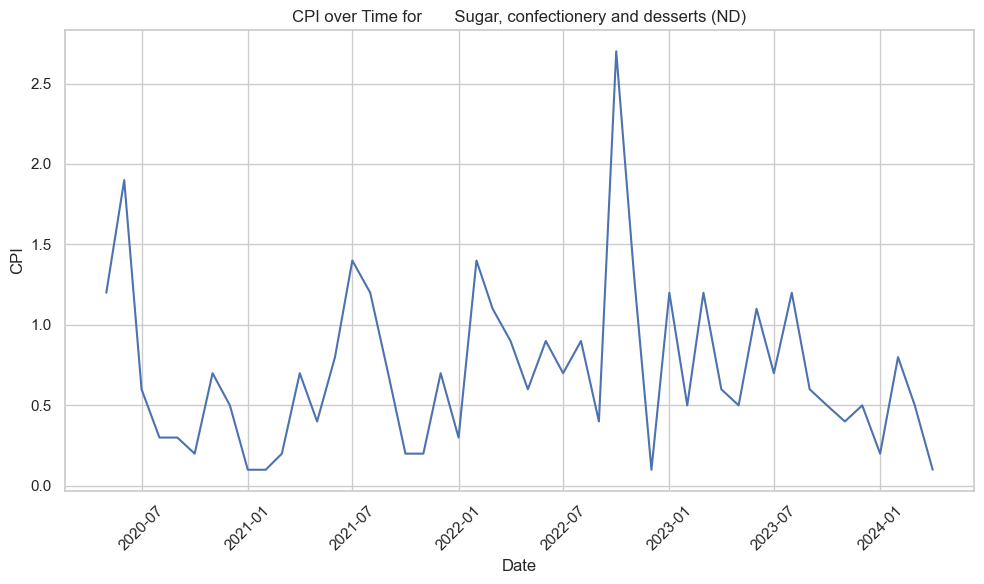

In [8]:
other_categories_data['Date'] = pd.to_datetime(other_categories_data['Date'])
other_categories_data.sort_values('Date', inplace=True)

# Plot each category separately
for category in other_categories_data['Series Title'].unique():
    category_data = other_categories_data[other_categories_data['Series Title'] == category]
    
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=category_data, x='Date', y='CPI')
    plt.title(f'CPI over Time for {category}')
    plt.xlabel('Date')
    plt.ylabel('CPI')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the plot
    plt.savefig(f'{category}.png')  # Save each plot with the category name
    plt.show()